In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


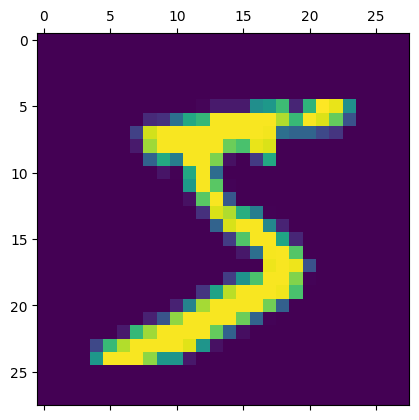

In [3]:
plt.matshow(X_train[0])

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [6]:
X_train_flattened.shape

(60000, 784)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4693 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9257


In [8]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2708 - accuracy: 0.9253


[0.27078762650489807, 0.9253000020980835]

In [9]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.35199593e-02, 3.21115493e-07, 5.73898554e-02, 9.68115985e-01,
       1.72886939e-03, 1.21611625e-01, 2.83501799e-06, 9.99799907e-01,
       1.29832342e-01, 6.03765965e-01], dtype=float32)

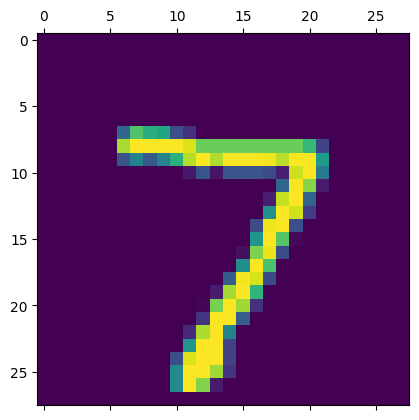

In [10]:
plt.matshow(X_test[0])

In [11]:
np.argmax(y_predicted[0])

7

In [12]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [13]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    1,    0,    4,    7,    3,    2,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   6,   12,  912,   18,    7,    3,   13,   11,   47,    3],
       [   4,    0,   16,  914,    0,   25,    4,   13,   29,    5],
       [   1,    1,    5,    2,  912,    0,   14,    5,   11,   31],
       [  11,    3,    1,   27,    7,  767,   20,    8,   43,    5],
       [  10,    3,    5,    1,    7,    8,  919,    2,    3,    0],
       [   2,    5,   21,    6,    5,    0,    0,  966,    6,   17],
       [   6,    7,    5,   15,    8,   15,   11,   12,  892,    3],
       [  10,    7,    1,    9,   25,    7,    0,   33,   15,  902]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

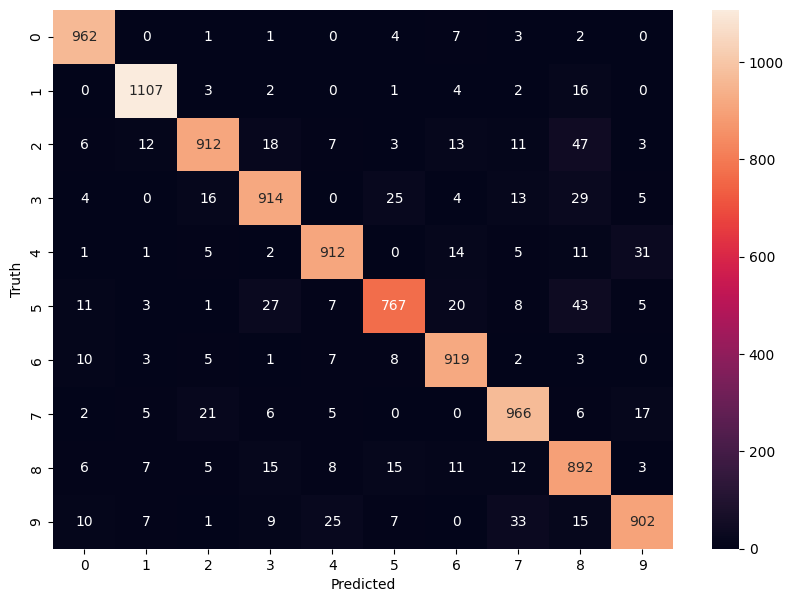

In [14]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2777 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1255 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0873 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0669 - accuracy: 0.9798
Epoch 5/5
1781/1875 [===========================>..] - ETA: 0s - loss: 0.0525 - accuracy: 0.9841

In [16]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9741


[0.08111583441495895, 0.9740999937057495]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

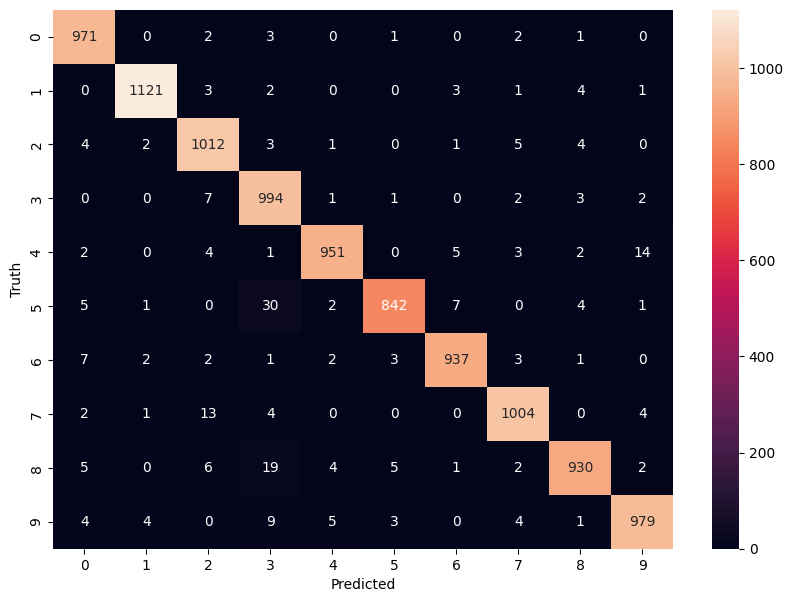

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2739 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1238 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0863 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0651 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0520 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0415 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0341 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0281 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0227 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.02

In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1002 - accuracy: 0.9719


[0.10024042427539825, 0.9718999862670898]